In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Нормалізація даних
train_images = train_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=60, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/60
938/938 [==============================] - 14s 13ms/step - loss: 1.2385 - accuracy: 0.6027 - val_loss: 0.5411 - val_accuracy: 0.8040
Epoch 2/60
938/938 [==============================] - 12s 13ms/step - loss: 0.7271 - accuracy: 0.7540 - val_loss: 0.4709 - val_accuracy: 0.8327
Epoch 3/60
938/938 [==============================] - 12s 12ms/step - loss: 0.6195 - accuracy: 0.7854 - val_loss: 0.4455 - val_accuracy: 0.8410
Epoch 4/60
938/938 [==============================] - 14s 15ms/step - loss: 0.5586 - accuracy: 0.8076 - val_loss: 0.4242 - val_accuracy: 0.8493
Epoch 5/60
938/938 [==============================] - 11s 12ms/step - loss: 0.5225 - accuracy: 0.8189 - val_loss: 0.4086 - val_accuracy: 0.8530
Epoch 6/60
938/938 [==============================] - 12s 12ms/step - loss: 0.4911 - accuracy: 0.8293 - val_loss: 0.3923 - val_accuracy: 0.8590
Epoch 7/60
938/938 [==============================] - 12s 13ms/step - loss: 0.4665 - accuracy: 0.8383 - val_loss: 0.3899 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nТочність на тестових даних:', test_acc)

313/313 - 1s - loss: 0.3078 - accuracy: 0.8948 - 1s/epoch - 4ms/step

Точність на тестових даних: 0.8948000073432922


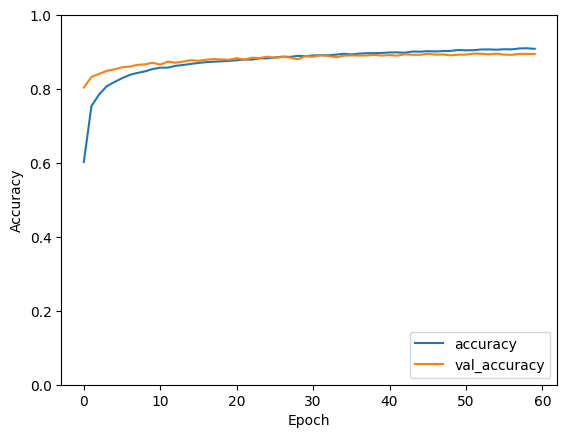

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Висновок

Створено нейронну мережу для класифікації зображень із датасету Fashion MNIST за допомогою бібліотеки Keras. Після кількох спроб досягнуто точності моделі на тестових даних близько 89%. Незважаючи на те, що це нижче за очікувану точність 91%, модель показала значні поліпшення в порівнянні з початковими спробами.

### Основні покращення:
1. **Збільшення кількості нейронів та шарів:**
2. **Використання L2 регуляризації:**
3. **Batch Normalization:**
4. **Використання Dropout:**
5. **Зменшення кроку навчання:**

### Результати
Після цих покращень модель навчалась протягом 60 епох із розміром батчу 64. На жаль, модель досягла точності лише 89% на тестових даних, що нижче за бажаний поріг у 91%.

Хоча модель не досягла бажаної точності 91%, досягнення 89% є значним покращенням, що свідчить про ефективність застосованих методів. Подальші експерименти з гіперпараметрами та техніками навчання можуть допомогти досягти кращих результатів у майбутньому.